In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt_tab')

# Import do módulo de pré-processamento
import sys
sys.path.append('../src')
from preprocessing import clean_text

# Carregar dados limpos
df = pd.read_csv('../data/cleaned/news_combined.csv')

# Aplicar pré-processamento
df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ruan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ruan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ruan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ruan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ruan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Separar dados
X = df['clean_text']
y = df['label']

# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vetorizar com TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Treinar modelo
model = LogisticRegression()
model.fit(X_train_vec, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Avaliação
y_pred = model.predict(X_test_vec)
y_pred_rf = rf_model.predict(X_test_vec)

In [31]:
# Avaliação
y_pred = model.predict(X_test_vec)
y_pred_lr = model.predict(X_test_vec)

In [33]:
# Relatório de classificação (Logistic Regression)
y_pred = model.predict(X_test_vec)
print("Resultados - Logistic Regression:\n")
print(classification_report(y_test, y_pred))

# Acurácia
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Acurácia Logistic Regression: {acc_lr:.2%}")

Resultados - Logistic Regression:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Acurácia Logistic Regression: 98.72%


In [35]:
# Relatório de classificação (Random Forest)
print("Resultados - Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

# Acurácia
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia Random Forest: {acc_rf:.2%}")

Resultados - Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Acurácia Random Forest: 99.73%


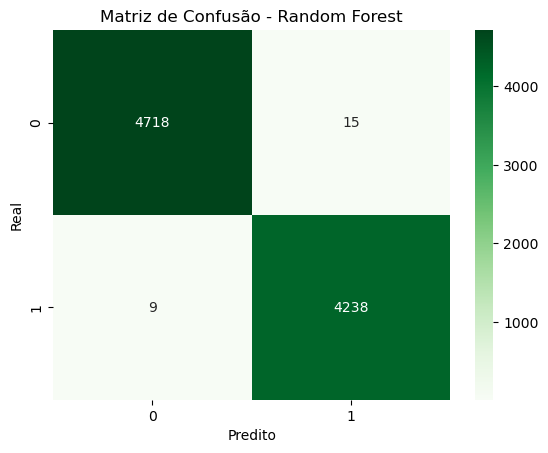

In [5]:
# Matriz de confusão (Random Forest)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

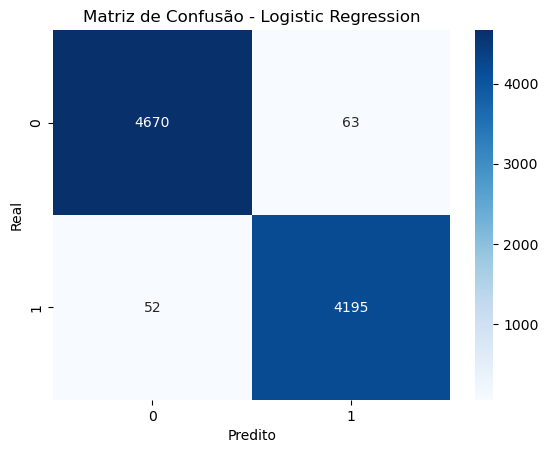

In [13]:
# Matriz de confusão (Logistic Regression)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Logistic Regression')
plt.show()

In [37]:
print(f"Acurácia Logistic Regression: {acc_lr:.2%}")
print(f"Acurácia Random Forest:     {acc_rf:.2%}")

Acurácia Logistic Regression: 98.72%
Acurácia Random Forest:     99.73%
